# Using Matplotlib

In [31]:
# required imports
#https://medium.com/analytics-vidhya/generate-a-static-choropleth-india-map-using-corona-virus-pandemic-data-19e9cbf5a07d

import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gdp  # conda
import geoplot as gplt # pip
import geoplot.crs as gcrs


sns.set_style('whitegrid')

In [98]:
#Reading the shape file
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)

map_df.head()

from datetime import date
output_file =  str(date.today())

In [99]:
data = pd.read_csv("All_States_Daily_Count.csv",index_col=0)
data.iloc[-1:, -4:] = data.iloc[1:-1,-4:].astype(int).sum().to_list()
data

,10-Mar,10-Mar.1,10-Mar.2,10-Mar.3,11-Mar,11-Mar.1,11-Mar.2,11-Mar.3,12-Mar,12-Mar.1,...,10-July.2,10-July.3,11-July,11-July.1,11-July.2,11-July.3,12-July,12-July.1,12-July.2,12-July.3
NaN,TCIN,TCFN,Cured,Death,TCIN,TCFN,Cured,Death,TCIN,TCFN,...,Cured,Death,TCIN,TCFN,Cured,Death,TCIN,TCFN,Cured,Death
Andhra Pradesh,0,0,0,0,0,0,0,0,1,0,...,12154,277,25422,0,13194,292,27235,0,14393,309
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,...,83,0,156,0,92,0,163,0,93,0
Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,...,120,2,335,0,120,2,341,0,125,2
Assam,0,0,0,0,0,0,0,0,0,0,...,8729,22,14600,0,9147,27,15536,0,9150,35
Bihar,0,0,0,0,0,0,0,0,0,0,...,9816,115,14575,0,10109,119,15373,0,10685,131
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,403,7,539,0,408,7,555,0,413,7
Chhattisgarh,0,0,0,0,0,0,0,0,0,0,...,2903,15,3767,0,3028,17,3897,0,3070,17
Dadra and Nagar Haveli,0,0,0,0,0,0,0,0,0,0,...,189,0,459,0,211,0,471,0,226,0
Delhi,4,0,0,0,5,0,0,0,6,0,...,82226,3258,109140,0,84694,3300,110921,0,87692,3334


In [103]:
total_cases = pd.DataFrame()
total_cured = pd.DataFrame()
total_deaths = pd.DataFrame()

In [104]:
i=1
for col in data.columns:
    if i%4==1:total_cases[col]=data[col]
    if i%4==3:total_cured[col]=data[col]
    if i%4==0:total_deaths[col]=data[col]
    i+=1

In [105]:
total_cases.drop(index=[np.NaN], axis=0, inplace=True)
total_cured.drop(index=[np.NaN], axis=0, inplace=True)
total_deaths.drop(index=[np.NaN], axis=0, inplace=True)
total_cases = total_cases.astype(int)
total_cured = total_cured.astype(int)
total_deaths = total_deaths.astype(int)

In [106]:
tot = total_cases.copy().transpose()
cur = total_cured.copy().transpose()
dea = total_deaths.copy().transpose()
cur.index = tot.index
dea.index = tot.index
active_cases = pd.DataFrame()
for col in tot:
    active_cases[col] = tot[col]-(cur[col]+dea[col])
    
active_cases

,Andhra Pradesh,Andaman and Nicobar Islands,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Delhi,Goa,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telengana,Tripura,Uttarakhand,Uttar Pradesh,West Bengal,Totals
10-Mar,0,0,0,0,0,0,0,0,4,0,...,1,0,0,1,1,0,0,9,0,31
11-Mar,0,0,0,0,0,0,0,0,5,0,...,1,1,0,1,1,0,0,9,0,44
12-Mar,1,0,0,0,0,0,0,0,6,0,...,1,1,0,1,1,0,0,10,0,54
13-Mar,1,0,0,0,0,0,0,0,6,0,...,1,1,0,1,1,0,0,10,0,60
14-Mar,1,0,0,0,0,0,0,0,5,0,...,1,0,0,1,1,0,0,6,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8-July,11200,72,169,4179,3182,86,650,222,25449,739,...,2020,4357,55,45842,11012,455,566,9514,7243,259779
9-July,10894,72,176,4591,3528,104,676,224,23452,824,...,1901,4715,62,46483,11933,436,562,9980,7705,265404
10-July,11383,68,180,5281,4013,113,757,222,21567,869,...,2012,5002,62,46655,12423,437,587,10373,8231,272521
11-July,11936,64,213,5426,4347,124,722,248,21146,895,...,2153,5057,54,46108,12680,545,621,11024,8881,279991


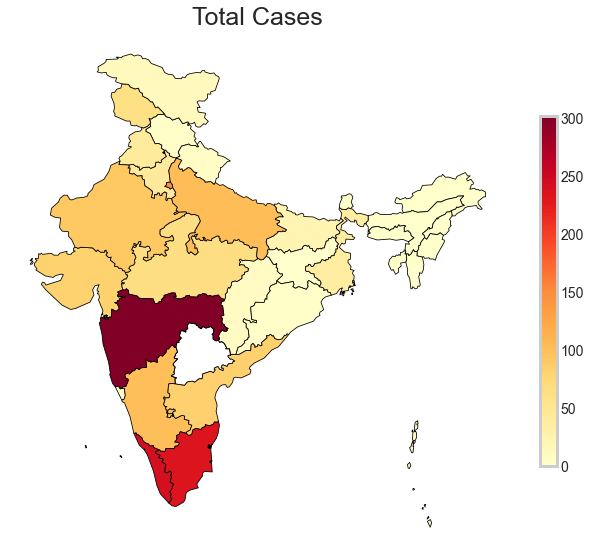

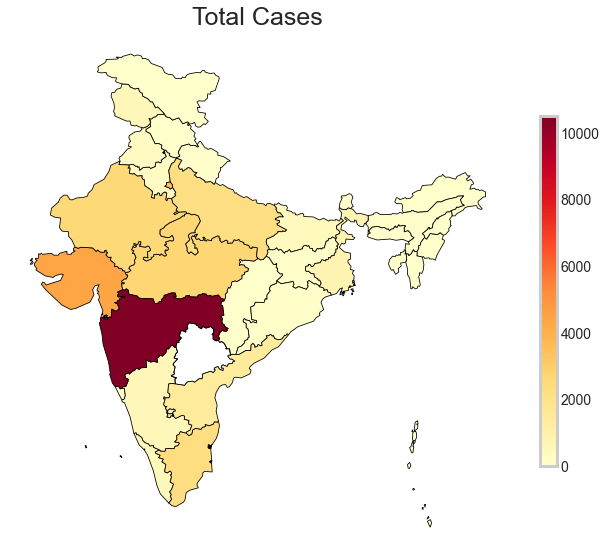

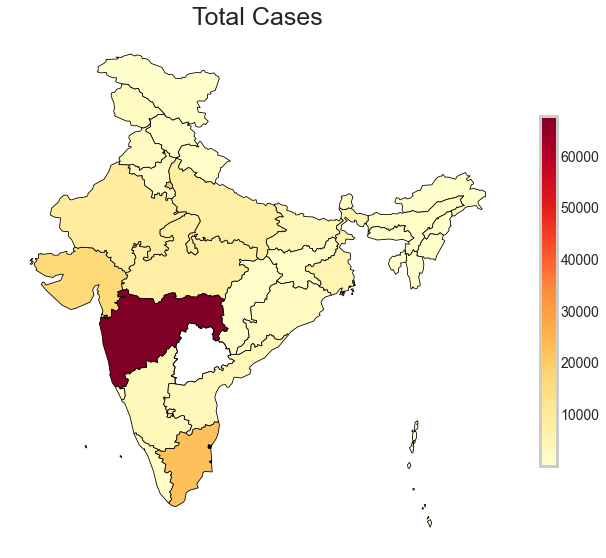

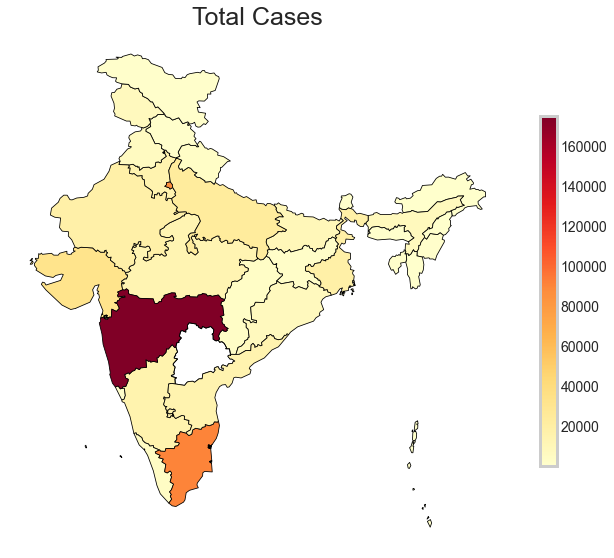

In [37]:
# Generates Total Cases Map
dfm = total_cases.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_cases'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/total_cases/' + i + '.png'
        # plot the figure
        merged.plot(column='total_cases',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.6},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

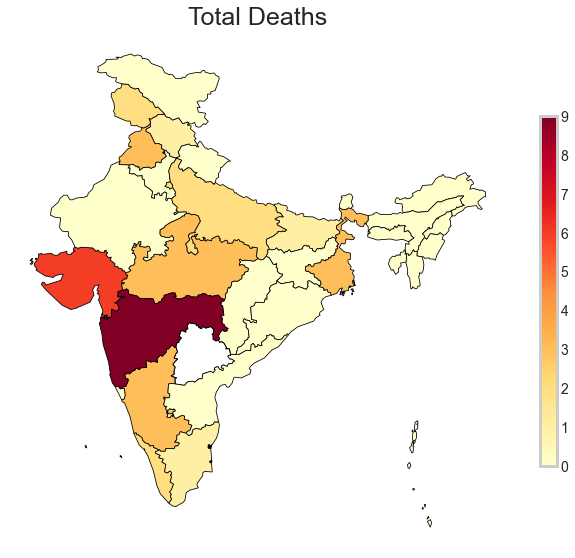

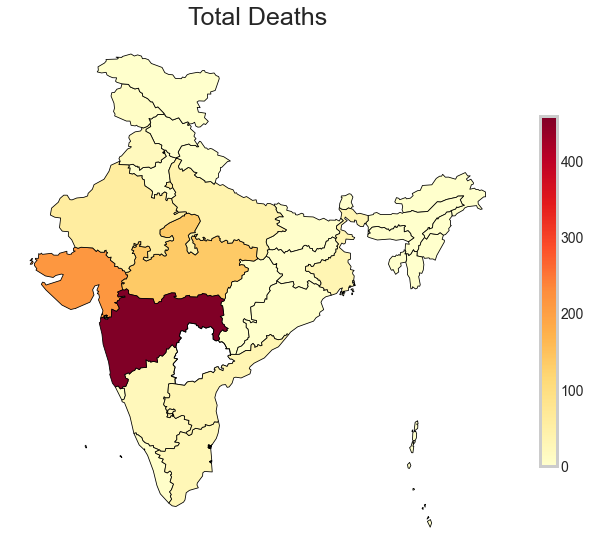

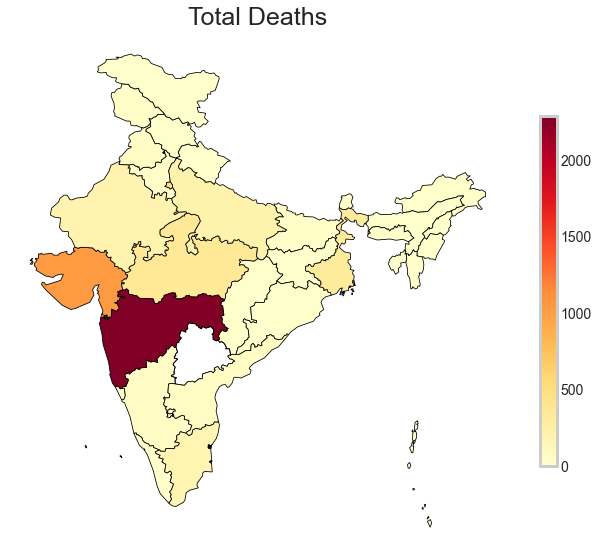

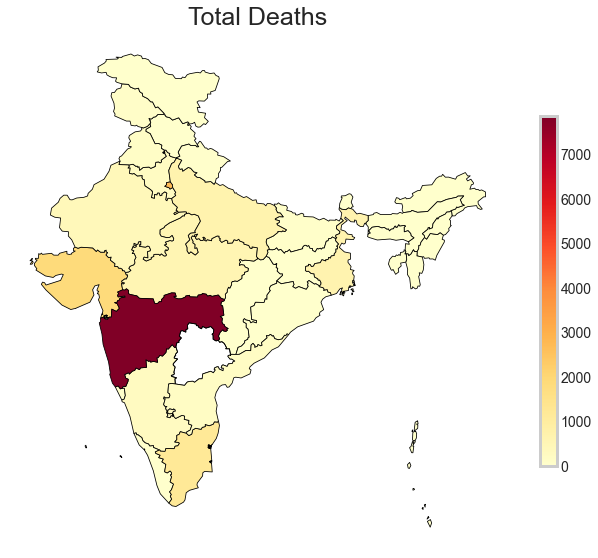

In [38]:
# Generates Total Deaths Map
dfm = total_deaths.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_deaths'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/deaths/' + i + '.png'
        # plot the figure
        merged.plot(column='total_deaths',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.6},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

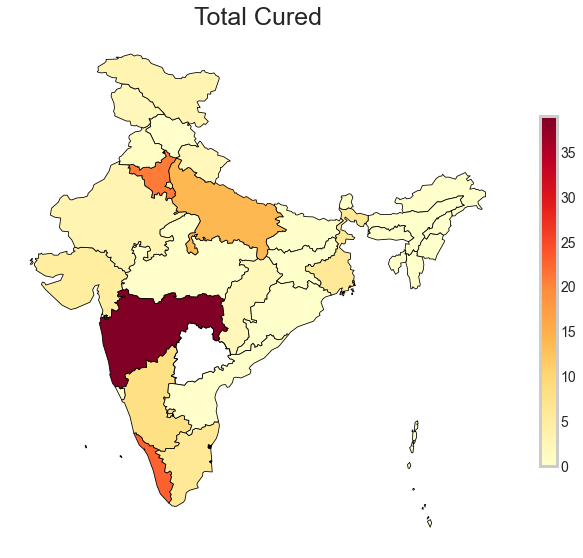

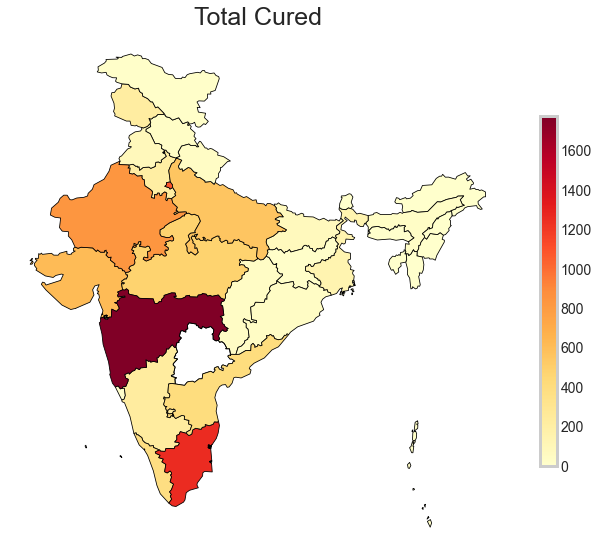

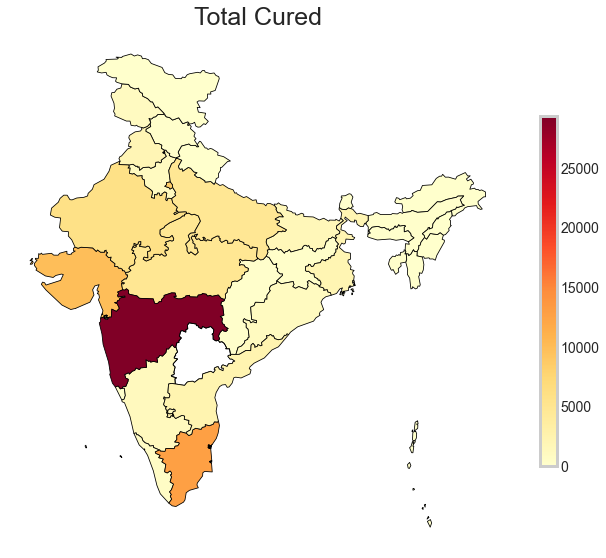

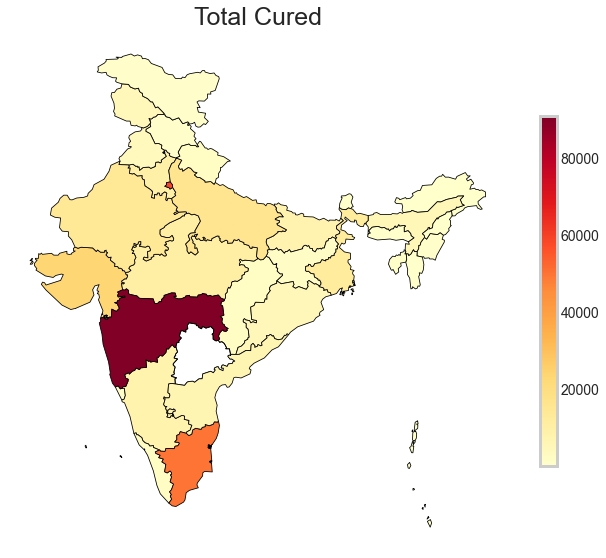

In [39]:
# Generates Total Cured Map 
dfm = total_cured.copy()
dfm.drop(dfm.tail(1).index,inplace=True)
for i in list(dfm):
    
    if ((i[0]=='0'and i[1]=='1') or (i[0]=='1'and i[1]=='-')):
        clmn = dfm.index
        df = pd.DataFrame(clmn,columns=['Name of State/UN'])
        df['total_cured'] = list(dfm[i])
        merged = map_df.set_index('st_nm').join(df.set_index('Name of State/UN'))
        merged.head()
        fig, ax = plt.subplots(1, figsize=(10, 10))
        ax.axis('off')
        ax.set_title('Total Cured', fontdict={'fontsize': '25', 'fontweight' : '10'})
        dest = 'Images/cured_cases/' + i + '.png'
        # plot the figure
        merged.plot(column='total_cured',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,legend_kwds={'shrink': 0.6},markersize=[39.739192, -104.990337])
        import matplotlib.pyplot as plt
        plt.savefig(dest, dpi=300, bbox_inches='tight')

In [40]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 7, 12)
time_axis = []
for dt in daterange(start_dt, end_dt):
    time_axis.append(dt)

In [110]:
cases = total_cases.copy().transpose()
date= pd.to_datetime(time_axis)
cases['date'] = date
active = active_cases.copy()
active['date'] = date


In [111]:
other_states = [col for col in cases.columns if col not in ["Delhi", "Maharashtra", "Tamil Nadu", "Totals"]]

In [112]:
cases["Rest of India"] = cases[other_states].sum(axis=1)
active["Rest of India"] = active_cases[other_states].sum(axis=1)

In [113]:
plot_cases = cases[["Delhi", "Maharashtra", "Tamil Nadu", "Rest of India"]]
plot_active = active[["Delhi", "Maharashtra", "Tamil Nadu", "Rest of India"]]

In [114]:
date = pd.DataFrame(date)
date.iloc[:,0].dt.is_month_start
plt.rcParams['figure.figsize'] = 12, 6
plt.style.use("fivethirtyeight")

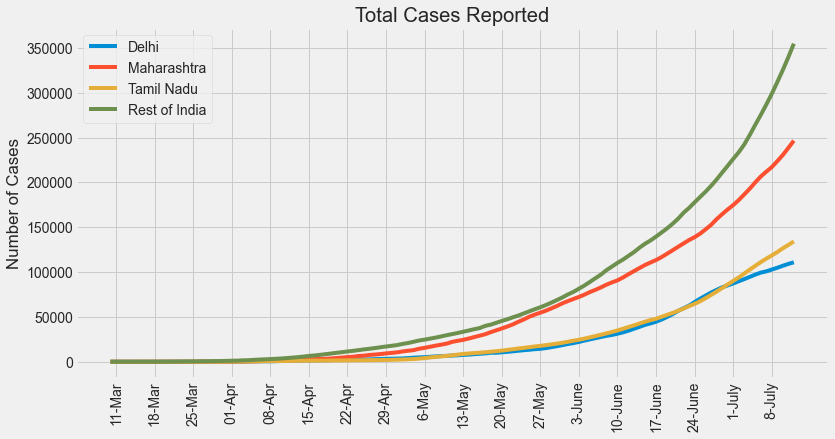

In [115]:
fig = plt.plot(plot_cases.index,plot_cases)
plt.title("Total Cases Reported")
plt.legend(labels=["Delhi", "Maharashtra", "Tamil Nadu", "Rest of India"])
plt.xticks(ticks=range(1,date.shape[0],7), rotation=90)
plt.ylabel("Number of Cases")
plt.savefig('Images/comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [95]:
plot_cases = pd.concat([plot_cases,cases['date']], axis=1)
plot_active = pd.concat([plot_active,cases['date']], axis=1)

In [125]:
starting_of_week = []
starting_week_dates = []
i = 0
wc = 0
for date in list(plot_cases.index.values):
    if (i%7 == 0):
        wc +=1
        starting_week_dates.append(date)
    starting_of_week.append(wc)
    i+=1
    
weeks = np.floor((plot_cases.shape[0]+6)/7)
weeks = int(weeks)
plot_cases['week'] = starting_of_week
plot_active['week'] = starting_of_week

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
# plot_cases['week'] = plot_cases['date'].dt.weekofyear
plot_by_week = plot_cases.groupby(['week']).sum()
plot_by_week['week'] = starting_week_dates
plot_by_week2 = pd.melt(plot_by_week, id_vars = "week") 
plot_by_week2

,Delhi,Maharashtra,Tamil Nadu,Rest of India,week
week,,,,,
1,42,107,7,297,10-Mar
2,125,363,22,1024,17-Mar
3,306,1070,231,3996,24-Mar
4,2158,2916,2318,11270,31-Mar
5,5845,9705,5838,26629,07-Apr
6,11892,22325,9058,54631,14-Apr
7,16918,44485,11889,90974,21-Apr
8,25785,75097,16786,132808,28-Apr
9,41297,126260,37594,189998,5-May


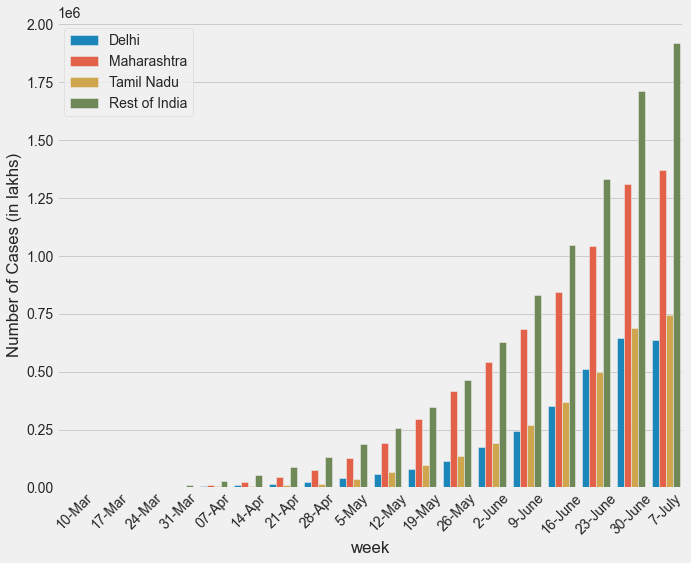

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x='week',y='value', hue='variable',data=plot_by_week2)
plt.ylabel("Total Number of Cases (in lakhs)")
plt.xticks(rotation = 45)
plt.legend(title="")
plt.savefig('Images/bar_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

In [100]:
plot_cases

,Delhi,Maharashtra,Tamil Nadu,Rest of India,date,date,week
10-Mar,4,2,1,24,2020-03-10,2020-03-10,1
11-Mar,5,2,1,36,2020-03-11,2020-03-11,1
12-Mar,6,11,1,39,2020-03-12,2020-03-12,1
13-Mar,6,14,1,43,2020-03-13,2020-03-13,1
14-Mar,7,14,1,45,2020-03-14,2020-03-14,1
...,...,...,...,...,...,...,...
8-July,102831,217121,118594,298853,2020-07-08,2020-07-08,18
9-July,104864,223724,122350,311973,2020-07-09,2020-07-09,18
10-July,107051,230599,126581,325410,2020-07-10,2020-07-10,18
11-July,109140,238461,130261,339638,2020-07-11,2020-07-11,18


In [139]:
new_cases = plot_cases.copy()
for row in range(1,len(plot_cases.index)):
    new_cases.iloc[row,0:4] = (plot_cases.iloc[row,0:4]-plot_cases.iloc[row-1,0:4]).astype(int)


In [132]:
err_del =[new_cases['Delhi'].iloc[0]]
err_mah = [new_cases['Maharashtra'].iloc[0]]
err_tn=[new_cases['Tamil Nadu'].iloc[0]]
err_rest=[new_cases['Rest of India'].iloc[0]]

In [140]:
for i in range(1,len(plot_cases.index)):
    err_del.append(new_cases['Delhi'].iloc[i]-new_cases['Delhi'].iloc[i-1])
    err_mah.append(new_cases['Maharashtra'].iloc[i]-new_cases['Maharashtra'].iloc[i-1])
    err_tn.append(new_cases['Tamil Nadu'].iloc[i]-new_cases['Tamil Nadu'].iloc[i-1])
    err_rest.append(new_cases['Rest of India'].iloc[i]-new_cases['Rest of India'].iloc[i-1])

In [146]:
error = pd.DataFrame({"err_del":err_del, "err_mah":err_mah, "err_tn":err_tn, "err_rest":err_rest}, index = new_cases.index, dtype = np.float32)

In [147]:
error['week'] = new_cases['week']
error = error.groupby(['week']).apply(np.std).drop(labels='week',axis=1)


In [161]:
week_avg = new_cases.groupby(['week']).sum()
week_avg['week'] = starting_week_dates
week_avg

,Delhi,Maharashtra,Tamil Nadu,Rest of India,week
week,,,,,
1,7,32,1,57,10-Mar
2,21,39,6,230,17-Mar
3,59,127,60,566,24-Mar
4,436,550,504,1586,31-Mar
5,631,1237,504,2699,07-Apr
6,849,2218,402,4835,14-Apr
7,915,3865,408,5316,21-Apr
8,1631,4906,1138,7001,28-Apr
9,2374,9197,4181,8564,5-May


In [162]:
for col in week_avg:
    if (col == 'week'):
        continue
    else:
        week_avg[col] = (week_avg[col]/7).astype(int)
week_avg

,Delhi,Maharashtra,Tamil Nadu,Rest of India,week
week,,,,,
1,1,4,0,8,10-Mar
2,3,5,0,32,17-Mar
3,8,18,8,80,24-Mar
4,62,78,72,226,31-Mar
5,90,176,72,385,07-Apr
6,121,316,57,690,14-Apr
7,130,552,58,759,21-Apr
8,233,700,162,1000,28-Apr
9,339,1313,597,1223,5-May


In [163]:
week_avg = pd.concat([week_avg, error], axis=1)

In [164]:
week_avg

,Delhi,Maharashtra,Tamil Nadu,Rest of India,week,err_del,err_mah,err_tn,err_rest
week,,,,,,,,,
1,1,4,0,8,10-Mar,2.000000,10.569498,0.534522,11.056441
2,3,5,0,32,17-Mar,3.207135,3.927922,0.880631,11.719511
3,8,18,8,80,24-Mar,9.810448,36.471963,6.880911,48.348227
4,62,78,72,226,31-Mar,112.211353,127.910045,89.243990,142.505997
5,90,176,72,385,07-Apr,127.109305,71.385130,32.449647,58.490188
6,121,316,57,690,14-Apr,164.542532,141.602490,35.690849,98.656485
7,130,552,58,759,21-Apr,67.386791,297.212767,32.396775,82.054735
8,233,700,162,1000,28-Apr,97.571115,206.715125,30.206095,211.521505
9,339,1313,597,1223,5-May,133.982789,476.757715,159.129648,198.969283


In [165]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Delhi'],
                     error_y=dict(type='data', array=np.array(week_avg['err_del'])
                                  ,visible = True,thickness =1),
                name='Delhi',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Maharashtra'],
                error_y=dict(type='data', array=np.array(week_avg['err_mah'])
                             ,visible = True, thickness =1),
                name='Maharashtra',
                marker_color='rgb(0,125,150)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Tamil Nadu'],
                error_y=dict(type='data', array=np.array(week_avg['err_tn'])
                             ,visible = True, thickness =1),
                name='Tamil Nadu',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=list(range(1,weeks+1)),
                y=week_avg['Rest of India'],
                error_y=dict(type='data', array=np.array(week_avg['err_rest']) 
                             ,visible = True, thickness =1),
                name='Rest of India',
                marker_color='rgb(255, 10, 10)'
                ))

fig.update_layout(
    title='Distribution of Covid-19 Cases Across India' ,
    
    xaxis=dict(tickfont_size=14,
#                title = 'Week',
               ticktext= week_avg['week'],
               tickvals = list(range(1,plot_cases.shape[0]+1))
              ),    
    yaxis=dict(
        title='Average new cases per week',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1,# gap between bars of the same location coordinate.
    shapes=[
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="Jul 2020",
            y0=0,
            x1="Apr 2020",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
        dict(
#             x=15.5,
#             y=400,
            xref="x",
            yref="y",
            text="",
#             family="sans serif",
            showarrow=False
        )
    ]
)

# fig.update_xaxes(week_avg['week'])
fig.write_image('Images/weekly_avg.png',width=800, height=600)
fig.show()


In [160]:
week_avg

,Delhi,Maharashtra,Tamil Nadu,Rest of India,err_del,err_mah,err_tn,err_rest
week,,,,,,,,
1,1,4,0,8,2.000000,10.569498,0.534522,11.056441
2,3,5,0,32,3.207135,3.927922,0.880631,11.719511
3,8,18,8,80,9.810448,36.471963,6.880911,48.348227
4,62,78,72,226,112.211353,127.910045,89.243990,142.505997
5,90,176,72,385,127.109305,71.385130,32.449647,58.490188
6,121,316,57,690,164.542532,141.602490,35.690849,98.656485
7,130,552,58,759,67.386791,297.212767,32.396775,82.054735
8,233,700,162,1000,97.571115,206.715125,30.206095,211.521505
9,339,1313,597,1223,133.982789,476.757715,159.129648,198.969283
